In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
from matplotlib.patches import Patch

### Get dictionnary of cells lines 
gene_dic={}
with open("/home/mouren/Data/article_repo_data/Interaction_data/transcriptId_GeneID_hg38.tsv") as file:
    for line in file:            
        gene_dic[line.strip().split('\t')[0]] = line.strip().split('\t')[1]

In [2]:
#Initialize lists and df
dfee = pd.read_csv("/home/mouren/Data/article_repo_data/Interaction_data/GTEx_eQTLs/bilan_GTExeQTLs_EE_normalized.tsv", sep='\t', index_col=0)
dfctrlneg = pd.read_csv("/home/mouren/Data/article_repo_data/Interaction_data/GTEx_eQTLs/bilan_GTExeQTLs_neg_normalized.tsv", sep='\t', index_col=0)

cells_ee = {col: [0, 0, 0] for col in dfee.columns}
cells_ctrlneg = {col: [0, 0, 0] for col in dfee.columns}

In [3]:
#Iterate on row and fields for cells 
for index, row in dfee.iterrows():
    exon_gene = gene_dic[index.split("_")[0]]
    for col in dfee.columns:
        intern = 0
        extern = 0

        if row[col] !=0 and row[col] !="0":
            for i in row[col].split(','):
                if i == exon_gene:
                    intern += 1
                else:
                    extern += 1
        else:
            continue
        
        if intern >0 and extern  >0:
            cells_ee[col][1]+=1 #mixed
        elif intern  >0 and extern == 0:
            cells_ee[col][0]+=1 #intern
        elif intern == 0 and extern  >0:
            cells_ee[col][2]+=1 #extern
        else:
            continue

for index, row in dfctrlneg.iterrows():
    exon_gene = gene_dic[index.split("_")[0]]
    for col in dfee.columns:
        intern = 0
        extern = 0
        
        if row[col] !=0  and row[col] !="0":
            for i in row[col].split(','):
                if i == exon_gene:
                    intern += 1
                else:
                    extern += 1
        else:
            continue

        if intern >0 and extern  >0:
            cells_ctrlneg[col][1]+=1 #mixed
        elif intern  >0 and extern == 0:
            cells_ctrlneg[col][0]+=1 #intern
        elif intern == 0 and extern  >0:
            cells_ctrlneg[col][2]+=1 #extern
        else:
            continue

In [4]:
#Calculate percentages of interactions
exons_totaux = 13481

res_dic_ee = {}
for key,values in cells_ee.items():
    entry = [(values[0]*100)/exons_totaux,(values[1]*100)/exons_totaux,(values[2]*100)/exons_totaux]
    if entry != [0,0,0]:
        res_dic_ee[key] = entry

exons_totaux_neg = 13253

res_dic_neg = {}
for key,values in cells_ctrlneg.items():
    entry = [(values[0]*100)/exons_totaux_neg,(values[1]*100)/exons_totaux_neg,(values[2]*100)/exons_totaux_neg]
    if entry != [0,0,0]:
        res_dic_neg[key] = entry

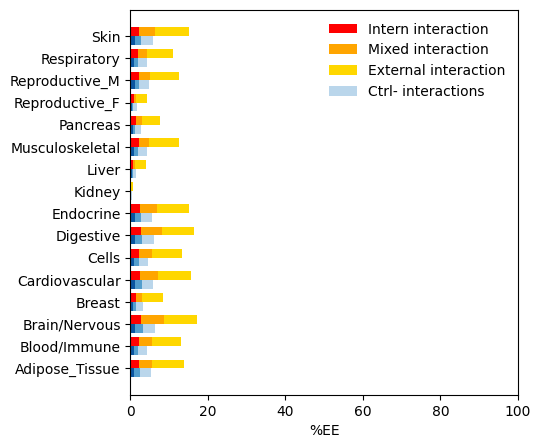

In [ ]:
#Plot
cell_names = list(res_dic_ee.keys())

red_values = [values[0] for values in res_dic_ee.values()]
red_values_neg = [values[0] for values in res_dic_neg.values()]

gold_values = [values[2] for values in res_dic_ee.values()]
gold_values_neg = [values[2] for values in res_dic_neg.values()]

orange_values = [values[1] for values in res_dic_ee.values()]
orange_values_neg = [values[1] for values in res_dic_neg.values()]

plt.figure(figsize=(5, 5))
bar_positions = range(len(cell_names))

bar_width = 0.4 
positions_red = [x + bar_width/2 for x in bar_positions]
positions_red_neg = [x - bar_width/2 for x in bar_positions]

positions_gold = [x + bar_width/2 for x in bar_positions]
positions_gold_neg = [x - bar_width/2 for x in bar_positions]

positions_orange = [x + bar_width/2 for x in bar_positions]
positions_orange_neg = [x - bar_width/2 for x in bar_positions]


plt.barh(positions_red, red_values, color='red', height=bar_width)
plt.barh(positions_red_neg, red_values_neg, color=sns.color_palette("Blues")[5], height=bar_width)

plt.barh(positions_orange, orange_values, color='orange', left=red_values, height=bar_width)
plt.barh(positions_orange_neg, orange_values_neg, color=sns.color_palette("Blues")[3], left=red_values_neg, height=bar_width)

plt.barh(positions_gold, gold_values, color='gold', left=[r+y for r,y in zip(red_values,orange_values)], height=bar_width)
plt.barh(positions_gold_neg, gold_values_neg, color=sns.color_palette("Blues")[1], left=[r+y for r,y in zip(red_values_neg,orange_values_neg)], height=bar_width)


plt.yticks(bar_positions, cell_names)

plt.xlabel('%EE')
plt.xlim(0, 100)

c1 = Patch(facecolor="red", label='Intern interaction')
c2 = Patch(facecolor="orange", label='Mixed interaction')
c3 = Patch(facecolor="gold", label='External interaction')
c4 = Patch(facecolor=sns.color_palette("Blues")[1], label='Ctrl- interactions')

plt.legend(handles=[c1,c2,c3,c4],frameon=False)

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig6/GTEx_normalized.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig6/GTEx_normalized.png", format="png", bbox_inches="tight", dpi=450)


plt.show()
